In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [12]:
%%html

<a href="index.html" target="_self">Back to home page</a>

### Table of Contents

In [13]:
%%html

- <a href = '#import'> Import data & refit best model </a>
<br>
- <a href = '#neighborhoods'> Model performance on different neighborhoods </a>
<br>
- <a href = '#home_types'> Model performance on different home types </a>


--------------

In [11]:
import pandas as pd
import numpy as np
from matplotlib.patches import Polygon
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn import covariance
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.decomposition import PCA 
import string
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import math
import string
import os
import datetime
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Predictions on subsets of our data

After creating a variety of different models and eventually choosing the best one to be a random forest, we were interested in looking at how our model performed on different subsets of the data, namely different neighborhoods and different home types.  Is our model better at predicting housing prices for certain neighborhoods or home types than for others?

<a id='import'></a>
### Import data and refit best model

In [6]:
## Loading Data 
test_data = pd.read_csv("test_imputed.csv")
train_data = pd.read_csv("train_imputed.csv")

In [7]:
## Separating our predictor and response variables 
x_train = train_data.drop(['zestimate_amount'],1)
y_train = train_data['zestimate_amount']
x_test = test_data.drop(['zestimate_amount'],1)
y_test = test_data['zestimate_amount']

In [8]:
## To fit model on entire data set 
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test]) 

In [9]:
model = ensemble.RandomForestRegressor(n_estimators=90, max_depth=40)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

We will now split up the test data into subsets based on both neighborhood and home type and score the model on each subset.

In [144]:
data = test_data

In [146]:
data_before_dummies = pd.read_csv("mn_crimes_and_schools.csv")

In [147]:
data_before_dummies = data_before_dummies[np.isfinite(data_before_dummies['zestimate_amount'])]

##### List of all the neighborhoods in our dataset:

In [148]:
neighborhoods = data_before_dummies['neighborhood'].unique()
print neighborhoods

['East Village' 'Lower East Side' 'Williamsburg' 'Greenwich Village'
 'Sunny Side' 'Little Italy' 'Soho' 'Park Slope' 'Borough Park'
 'Brownsville' 'Boerum Hill' 'Bushwick' 'Bedford-Stuyvesant'
 'Carroll Gardens' 'Fort Green' 'Gramercy' 'Chelsea' 'Chinatown' 'Tribeca'
 'West Village' 'Midtown' 'Murray Hill' 'North Sutton Area' 'Battery Park'
 'Financial District' 'Cobble Hill' 'New Brighton' 'Clifton' 'Clinton'
 'Upper East Side' 'Carnegie Hill' 'Astoria-Long Island City'
 'Jackson Heights' 'Upper West Side' 'Garment District' 'Yorkville'
 'East Harlem' 'Harlem' 'South Bronx' 'Central Park' 'Morningside Heights'
 'Hamilton Heights' 'High Bridge' 'Washington Heights' 'Tremont' 'Inwood']


##### LIst of all of the home types in our dataset:

In [149]:
home_types = data_before_dummies['home_type'].unique()
print home_types

['MultiFamily2To4' 'Cooperative' 'Condominium' 'SingleFamily' 'Apartment'
 'Duplex' 'Townhouse' 'Quadruplex' 'Unknown' 'Triplex' 'Miscellaneous'
 'MultiFamily5Plus' 'Mobile' nan]


In [150]:
# get rid of nan
home_types = home_types[:13]

<a id='neighborhoods'></a>
### Model performance on different neighborhoods

In [173]:
scores_list = []
neigh_list = []
for neigh in neighborhoods:
    col_name = "neighborhood_" + neigh
    if len(data[data[col_name] == 1]) != 0:
        subset = data[data[col_name] == 1]
        x_subset = subset.drop(['zestimate_amount'],1)
        y_subset = subset['zestimate_amount']
        score = model.score(x_subset, y_subset)    
        print neigh + ": " + str(score)
        neigh_list += [neigh]
        scores_list += [score]
        num_vals_list += [num_vals]

East Village: 0.942209760543
Lower East Side: 0.968604405738
Williamsburg: -7.96508995537
Greenwich Village: 0.972420645162
Sunny Side: -244.513150872
Little Italy: 0.970830528828
Soho: 0.945342029976
Park Slope: -207.140744436
Borough Park: 0.397326831659
Brownsville: 0.0
Boerum Hill: 0.0
Bedford-Stuyvesant: 0.0
Carroll Gardens: -2.06005766948
Gramercy: 0.968701965366
Chelsea: 0.969092777455
Chinatown: 0.996356163706
Tribeca: 0.962156758375
West Village: 0.969748621684
Midtown: 0.923789637843
Murray Hill: 0.995468292541
North Sutton Area: 0.996103167176
Battery Park: 0.945603598133
Financial District: 0.958794521163
Cobble Hill: 0.0
Clinton: 0.98178794195
Upper East Side: 0.92286126542
Carnegie Hill: 0.929065347015
Astoria-Long Island City: -6.18059817547
Upper West Side: 0.956989445558
Garment District: 0.88754360107
Yorkville: 0.955978208229
East Harlem: 0.967789700409
Harlem: 0.958688299012
South Bronx: -22.8516457663
Central Park: 0.917133646535
Morningside Heights: 0.943331881473

In [174]:
for i in range(len(scores_list)):
    if scores_list[i] < 0:
        scores_list[i] = 0

In [175]:
results_df = pd.DataFrame(neigh_list, columns = ["neighborhood"])
results_df["score"] = scores_list

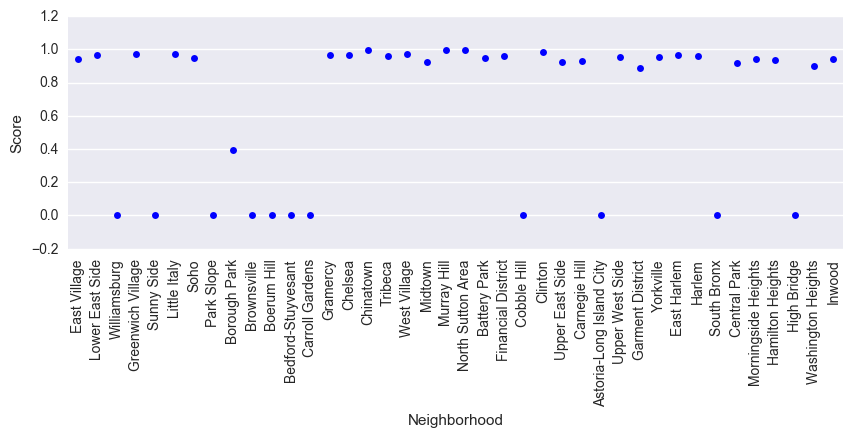

In [176]:
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.stripplot(neigh_list, scores_list, color = "blue")
ax.set_xticklabels(neigh_list, rotation=90)
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Score")

<a id='home_types'></a>
### Model performance on different home types

In [177]:
home_types

array(['MultiFamily2To4', 'Cooperative', 'Condominium', 'SingleFamily',
       'Apartment', 'Duplex', 'Townhouse', 'Quadruplex', 'Unknown',
       'Triplex', 'Miscellaneous', 'MultiFamily5Plus', 'Mobile'], dtype=object)

In [178]:
scores_list = []
ht_list = []
for home_type in home_types:
    col_name = "home_type_" + home_type
    if len(data[data[col_name] == 1]) != 0:
        subset = data[data[col_name] == 1]
        x_subset = subset.drop(['zestimate_amount'],1)
        y_subset = subset['zestimate_amount']
        score = model.score(x_subset, y_subset)
        print home_type + ": " + str(score)
        ht_list += [home_type]
        scores_list += [score]

MultiFamily2To4: 0.917796313076
Cooperative: 0.934230882015
Condominium: 0.97614061751
SingleFamily: 0.957780196619
Apartment: 0.816877906344
Duplex: 0.983700483779
Townhouse: 0.906550053332
Quadruplex: 0.972492776353
Unknown: 0.846395466104
Triplex: 0.993114792775
Miscellaneous: 0.62428356869
MultiFamily5Plus: 0.0
Mobile: 0.0


In [179]:
for i in range(len(scores_list)):
    if scores_list[i] < 0:
        scores_list[i] = 0

In [180]:
results_df = pd.DataFrame(ht_list, columns = ["neighborhood"])
results_df["score"] = scores_list

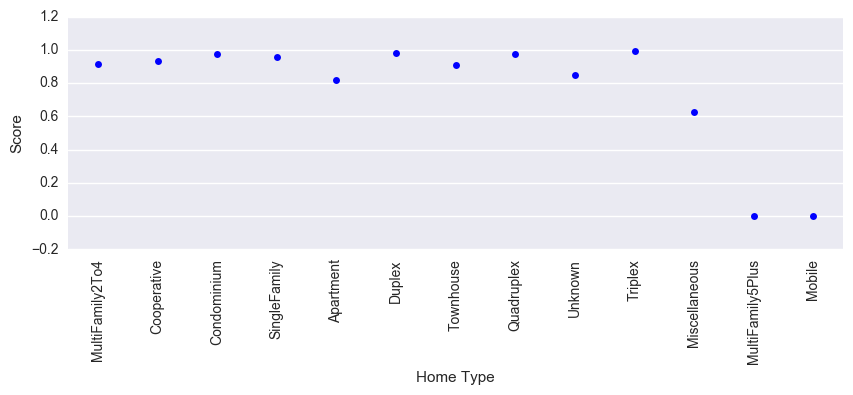

In [181]:
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.stripplot(ht_list, scores_list, color = 'blue')
ax.set_xticklabels(ht_list, rotation=90)
ax.set_xlabel("Home Type")
ax.set_ylabel("Score")
#ax.legend(bbox_to_anchor=(1.5, 1))

We can see that there are in fact differences in how well our model performs for different neighborhoods and different home types.  Our model is quite good for many of the neighborhoods and home types for which we had a lot of data, but has lower $R^2$ values for some of the other neighborhoods and home types.